# Tensorflow 2 Object Detection: Train model



In [3]:
!pip uninstall -y tensorflow
!pip install tensorflow=="2.13.0"

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are inst

In [1]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4245, done.
remote: Counting objects: 100% (4245/4245), done.
remote: Compressing objects: 100% (3238/3238), done.
remote: Total 4245 (delta 1192), reused 2134 (delta 936), pack-reused 0 (from 0)
Receiving objects: 100% (4245/4245), 48.86 MiB | 13.88 MiB/s, done.
Resolving deltas: 100% (1192/1192), done.
Updating files: 100% (3824/3824), done.


In [2]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.31.0 which is incompatible.


In [4]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [5]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2024-08-15 11:11:39.385318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-08-15 11:11:44.446050: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0815 11:11:44.484200 132777398964864 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0815 11:11:44.763824 132777398964864 model_builder.py:1112] Building experimental DeepMA

In [6]:
!wget https://raw.githubusercontent.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/master/generate_tfrecord.py

--2024-08-15 11:12:58--  https://raw.githubusercontent.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/master/generate_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3470 (3.4K) [text/plain]
Saving to: ‘generate_tfrecord.py’

generate_tfrecord.p 100%[===================>]   3.39K  --.-KB/s    in 0s      

2024-08-15 11:12:58 (49.5 MB/s) - ‘generate_tfrecord.py’ saved [3470/3470]



In [8]:
train_record_path = '/content/train.record'
test_record_path = '/content/test.record'
labelmap_path = '/content/labelmap.pbtxt'

## Configuring training

Now that the data is ready it's time to create a training configuration. The OD API supports lots of models, each with its own config file. In this notebook I'm making use of EfficientDet, but you can replace it with any model available in the [Tensorflow 2 Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md).

In [13]:
batch_size = 8
num_steps = 120
num_eval_steps = 6

In [10]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d0_coco17_tpu-32.tar.gz

--2024-08-15 11:13:55--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.101.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  30.0MB/s    in 1.0s    

2024-08-15 11:13:57 (30.0 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [11]:
fine_tune_checkpoint = '/content/efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0'

In [12]:
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config

base_config_path = '/content/ssd_efficientdet_d0_512x512_coco17_tpu-8.config'

--2024-08-15 11:14:10--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0s      

2024-08-15 11:14:10 (63.4 MB/s) - ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’ saved [4630/4630]



In [14]:
# edit configuration file (from https://colab.research.google.com/drive/1sLqFKVV94wm-lglFq_0kGo2ciM0kecWD)

import re

with open(base_config_path) as f:
    config = f.read()

with open('model_config.config', 'w') as f:

  # Set labelmap path
  config = re.sub('label_map_path: ".*?"',
             'label_map_path: "{}"'.format(labelmap_path), config)

  # Set fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)

  # Set train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")',
                  'input_path: "{}"'.format(train_record_path), config)

  # Set test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")',
                  'input_path: "{}"'.format(test_record_path), config)

  # Set number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: {}'.format(4), config)

  # Set batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)

  # Set training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)

  # Set fine-tune checkpoint type to detection
  config = re.sub('fine_tune_checkpoint_type: "classification"',
             'fine_tune_checkpoint_type: "{}"'.format('detection'), config)

  f.write(config)

In [15]:
%cat model_config.config

 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 4
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      m

In [16]:
model_dir = 'training/'
pipeline_config_path = '/content/model_config.config'

## Train detector

In [17]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2024-08-15 11:20:33.670374: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-08-15 11:20:36.959836: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0815 11:20:36.961400 133956687364736 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 120
I0815 11:20:36.984144 133956687364736 config_util.py:552] Maybe overwriting train_steps: 120
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0815 11:20:36.984349 1339566873

## Export model inference graph

In [18]:
output_directory = 'inference_graph'

!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}

2024-08-15 12:10:05.643468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-08-15 12:10:13.283654: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I0815 12:10:13.320226 134623881974400 ssd_efficientnet_bifpn_feature_extractor.py:161] EfficientDet EfficientNet backbone version: efficientnet-b0
I0815 12:10:13.320405 134623881974400 ssd_efficientnet_bifpn_feature_extractor.py:163] EfficientDet BiFPN num filters: 64
I0815 12:10:13.320479 134623881974400 ssd_efficientnet_bifpn_feature_extractor.py:164] EfficientDet BiFPN num iterations: 3
I0815 12:10:13.327125 134623881974400 efficientnet_model.py:143] round_filter input=32 ou

In [19]:
from google.colab import files
files.download(f'/content/{output_directory}/saved_model/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Test trained model on test images

based on [Object Detection API Demo](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/object_detection_tutorial.ipynb) and [Inference from saved model tf2 colab](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/inference_from_saved_model_tf2_colab.ipynb).

In [26]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [40]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('images/test')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('images/test/B_en-3D_N.jpg'),
 PosixPath('images/test/B_en-3D_Ntg.jpg'),
 PosixPath('images/test/B_en_sw_N.jpg'),
 PosixPath('images/test/B_en_sw_Njm.jpg'),
 PosixPath('images/test/B_en_sw_Nmn.jpg'),
 PosixPath('images/test/ENEC_safety-3D_Nqasdf.jpg'),
 PosixPath('images/test/ENISO_13485_Ae-3D_N.jpg'),
 PosixPath('images/test/ENISO_13485_Ae-3D_Njytf.jpg'),
 PosixPath('images/test/ENISO_13485_Ae-3D_Nytrd.jpg'),
 PosixPath('images/test/ENISO_13485_Q-3D_Nytf.jpg'),
 PosixPath('images/test/GS-A_swtred.jpg'),
 PosixPath('images/test/GS-A_swtrf.jpg'),
 PosixPath('images/test/GS-A_swujn.jpg'),
 PosixPath('images/test/GS-A_swuytgf.jpg'),
 PosixPath('images/test/GS-B_sw-0000.jpg'),
 PosixPath('images/test/GS-B_swqaz.jpg'),
 PosixPath('images/test/GS_3D_vnbvcuytfvb.jpg'),
 PosixPath('images/test/GS_3D_vnh.jpg'),
 PosixPath('images/test/GS_3D_vqasdf.jpg'),
 PosixPath('images/test/GS_3D_vuyt.jpg'),
 PosixPath('images/test/GS_3D_vuytghugy.jpg'),
 PosixPath('images/test/GS_3D_vwsxc.jpg'),

In [46]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data)).convert('RGB')
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [47]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [48]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/{output_directory}/saved_model')
print(model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7c97f66ea3b0>


In [49]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

In [50]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

Input image shape: (354, 354, 3)


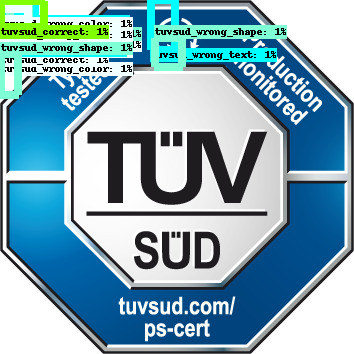

Input image shape: (354, 354, 3)


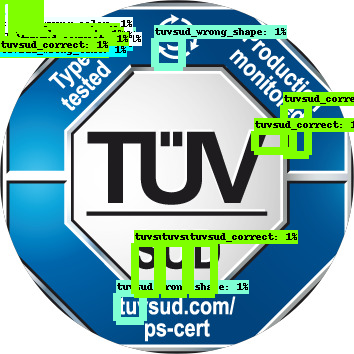

Input image shape: (354, 354, 3)


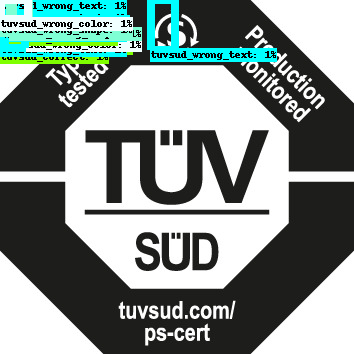

Input image shape: (354, 354, 3)


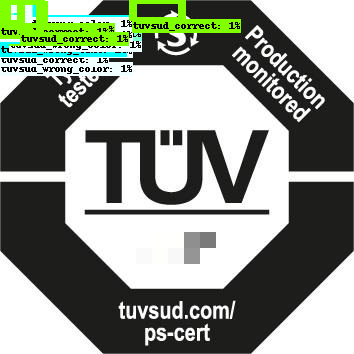

Input image shape: (354, 354, 3)


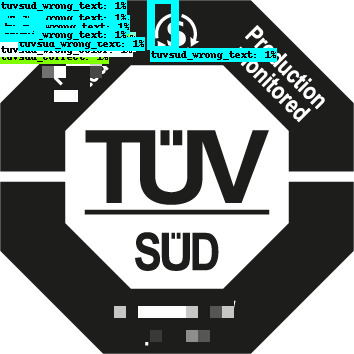

Input image shape: (354, 920, 3)


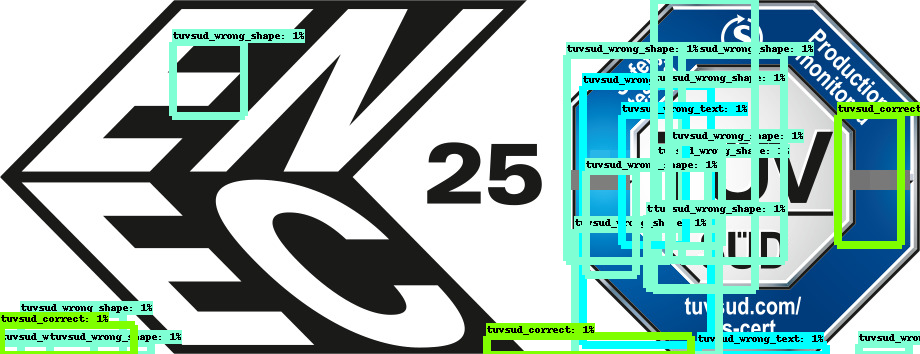

Input image shape: (402, 354, 3)


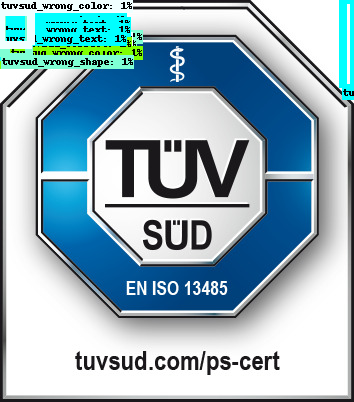

Input image shape: (402, 354, 3)


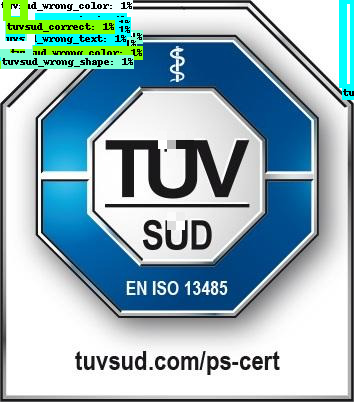

Input image shape: (402, 354, 3)


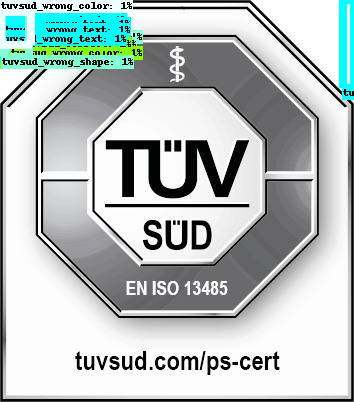

Input image shape: (402, 354, 3)


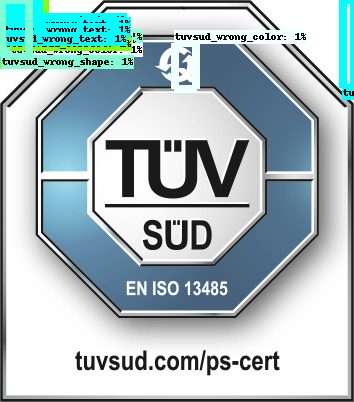

Input image shape: (357, 354, 3)


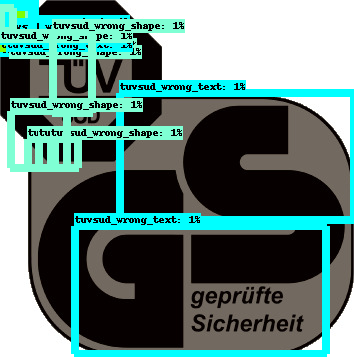

Input image shape: (357, 354, 3)


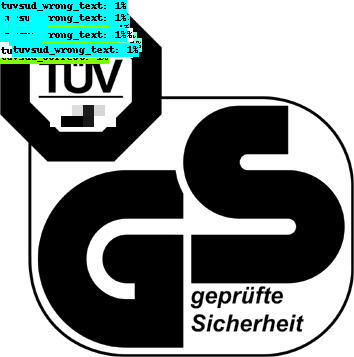

Input image shape: (357, 354, 3)


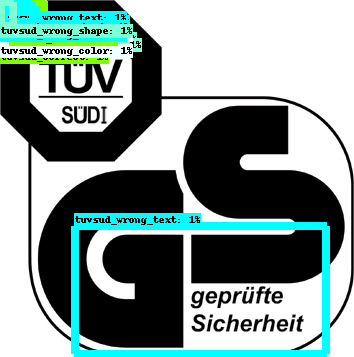

Input image shape: (357, 354, 3)


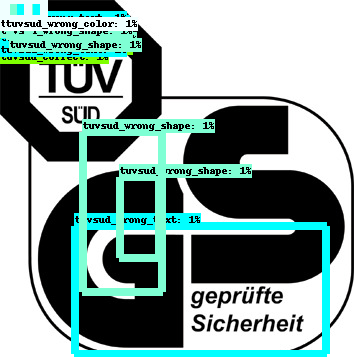

Input image shape: (153, 354, 3)


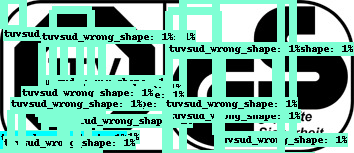

Input image shape: (153, 354, 3)


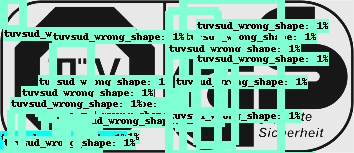

Input image shape: (807, 800, 3)


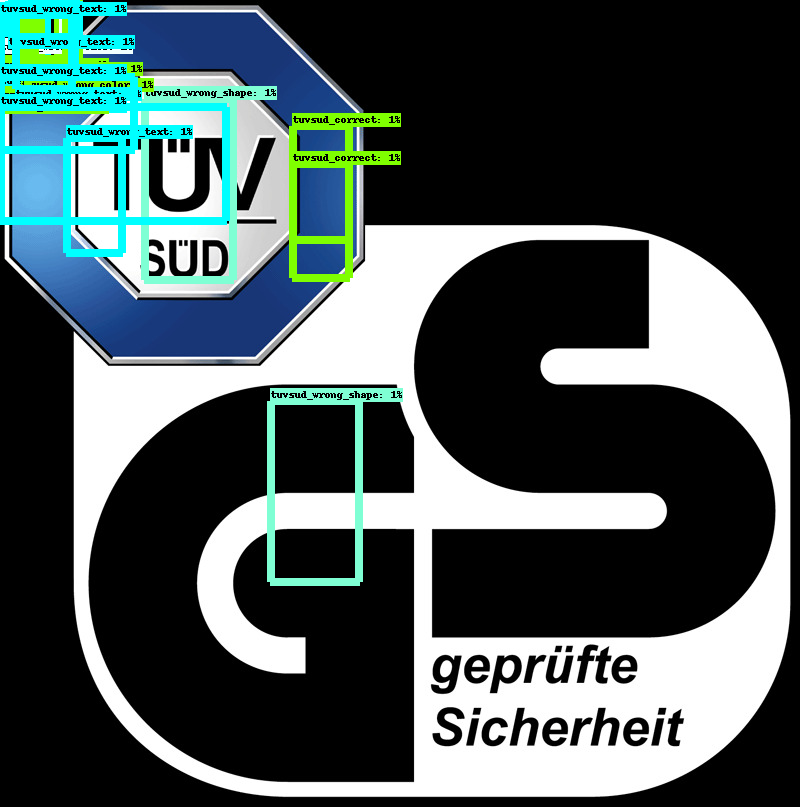

Input image shape: (1583, 1568, 3)


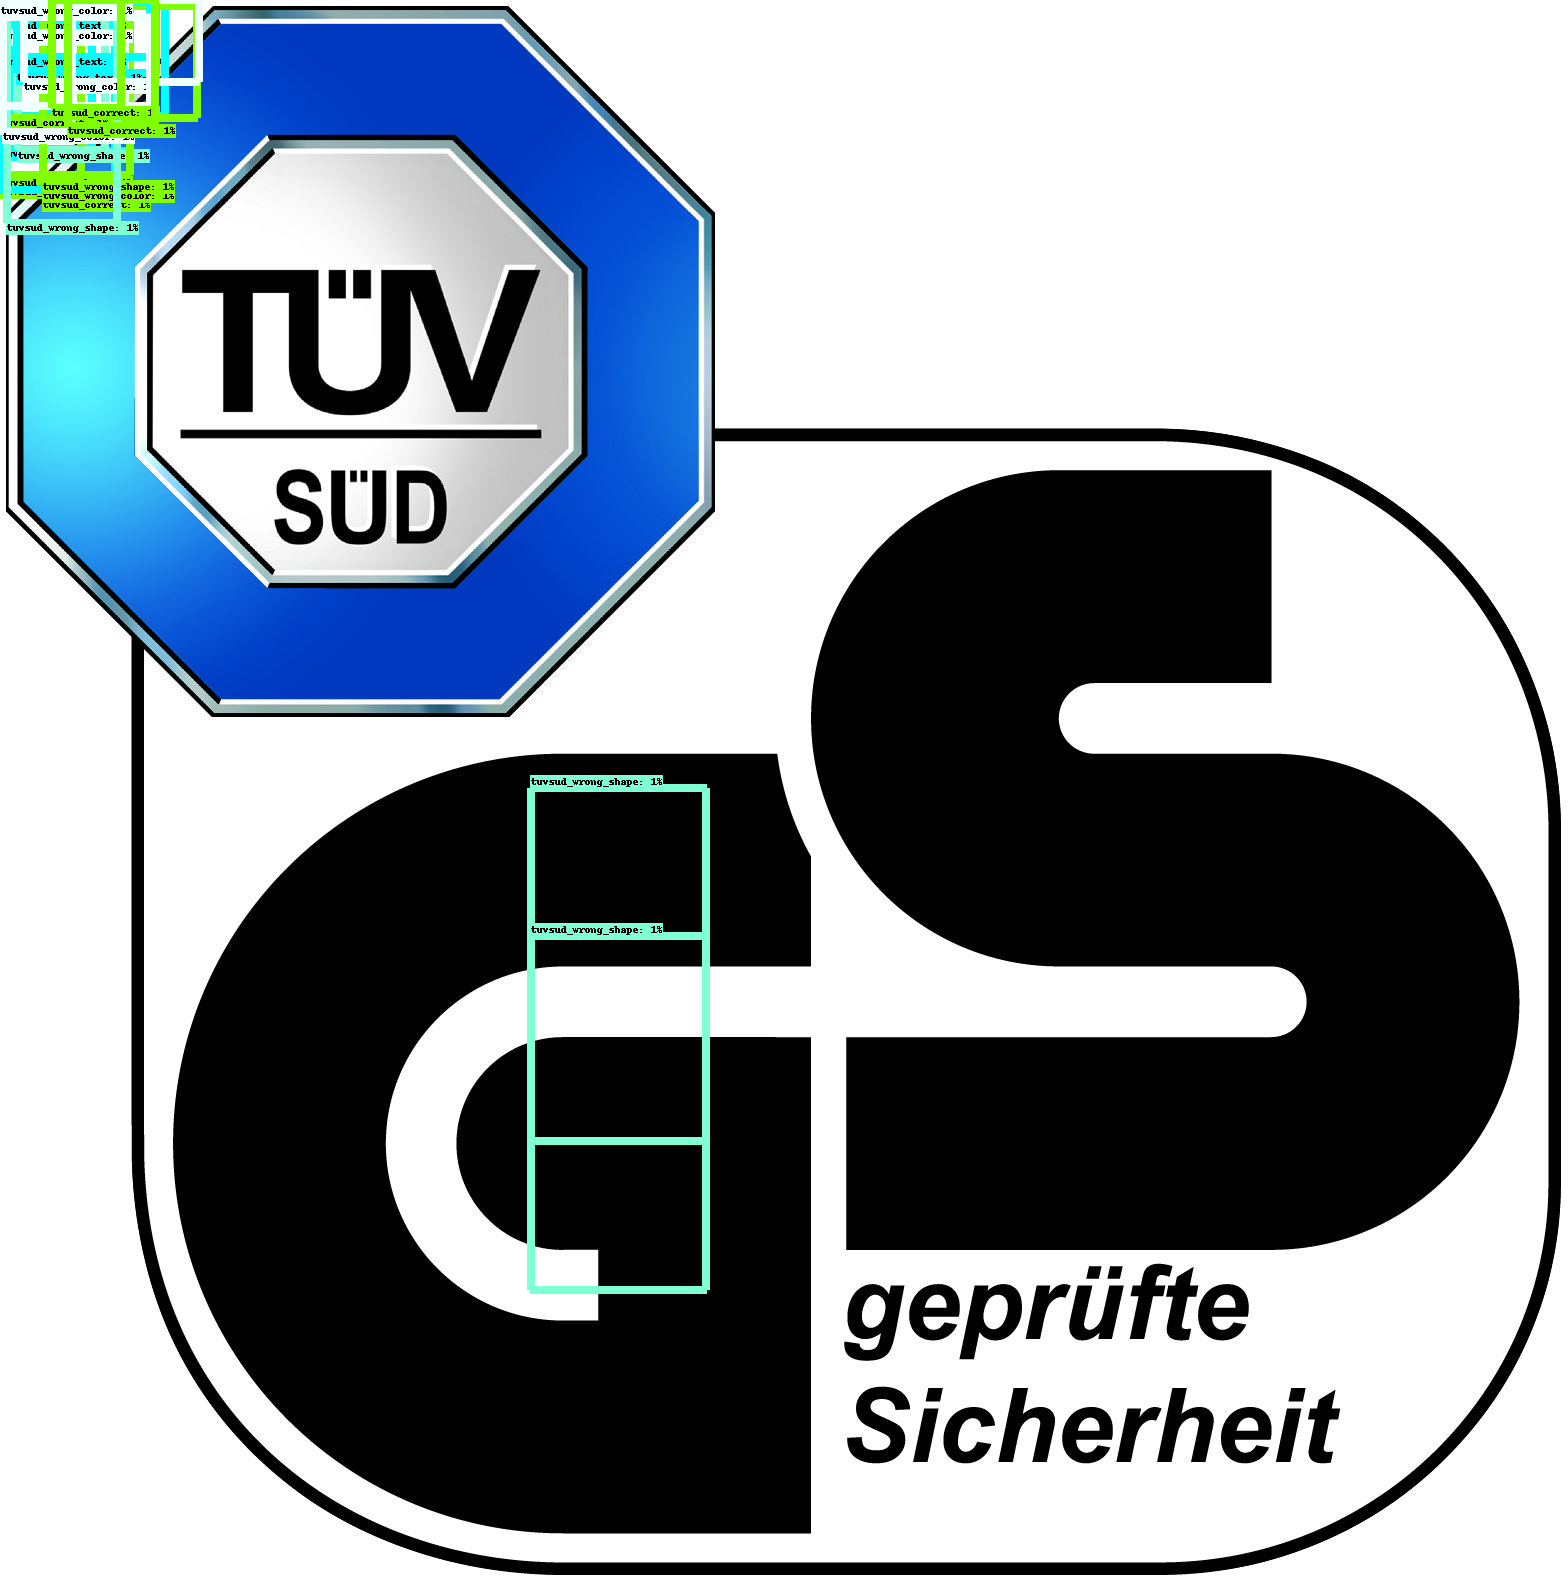

Input image shape: (807, 800, 3)


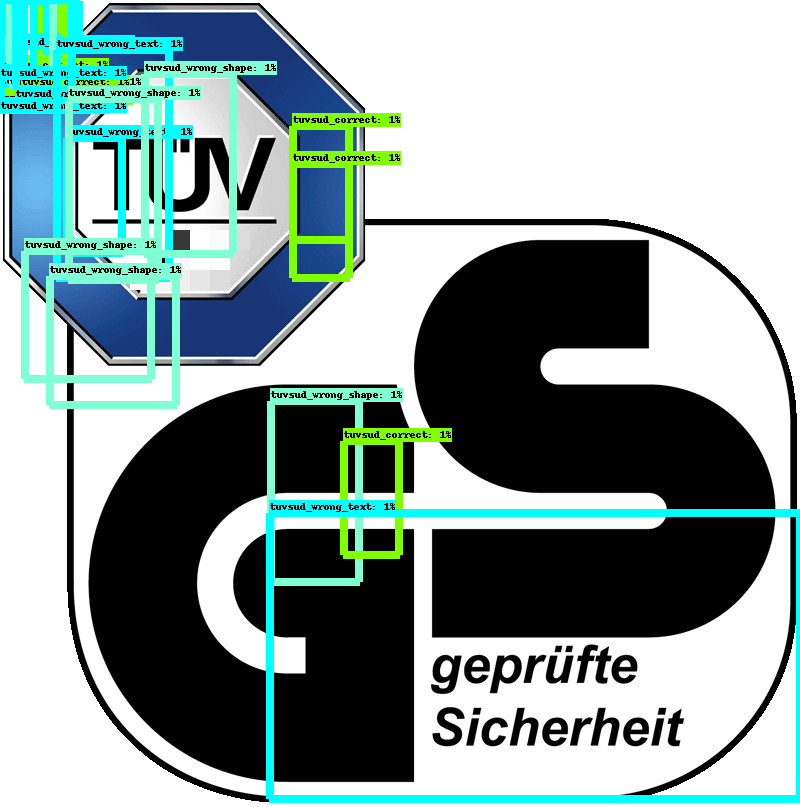

Input image shape: (354, 815, 3)


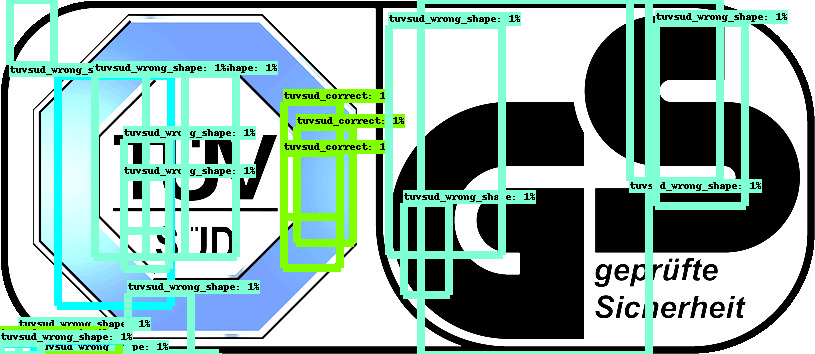

Input image shape: (354, 815, 3)


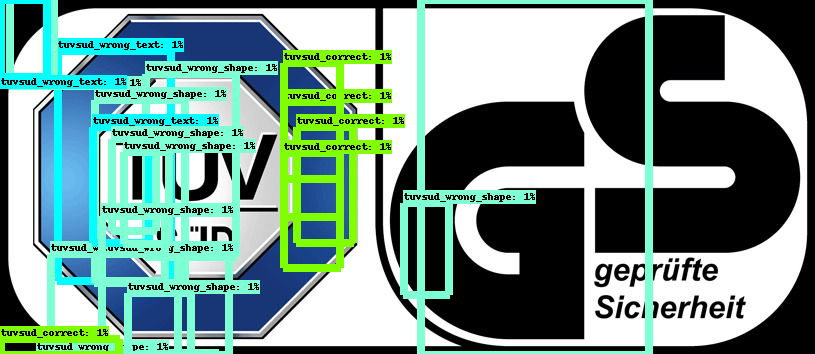

Input image shape: (807, 800, 3)


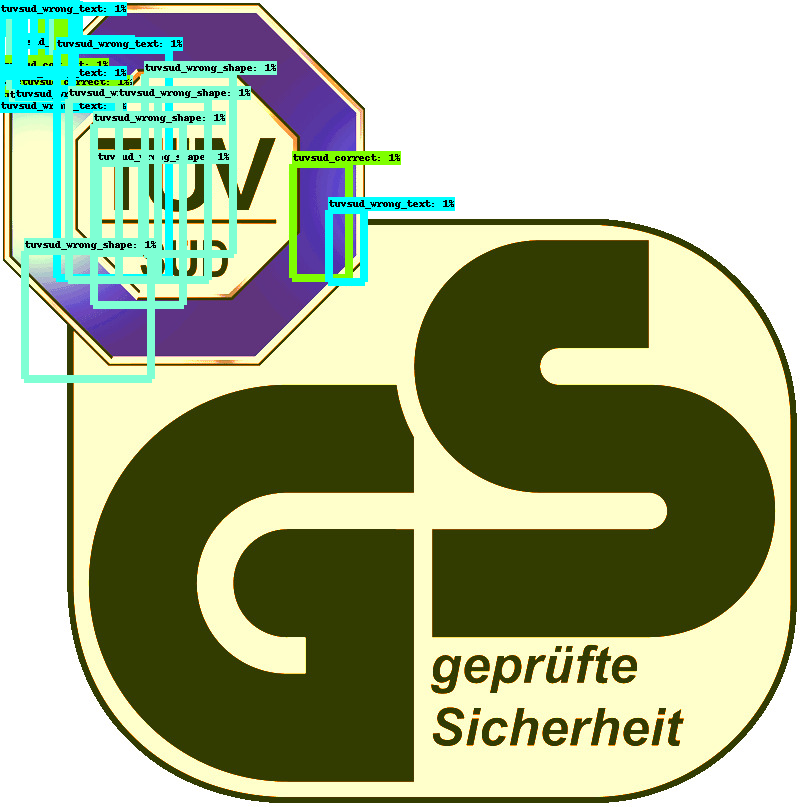

Input image shape: (1583, 1568, 3)


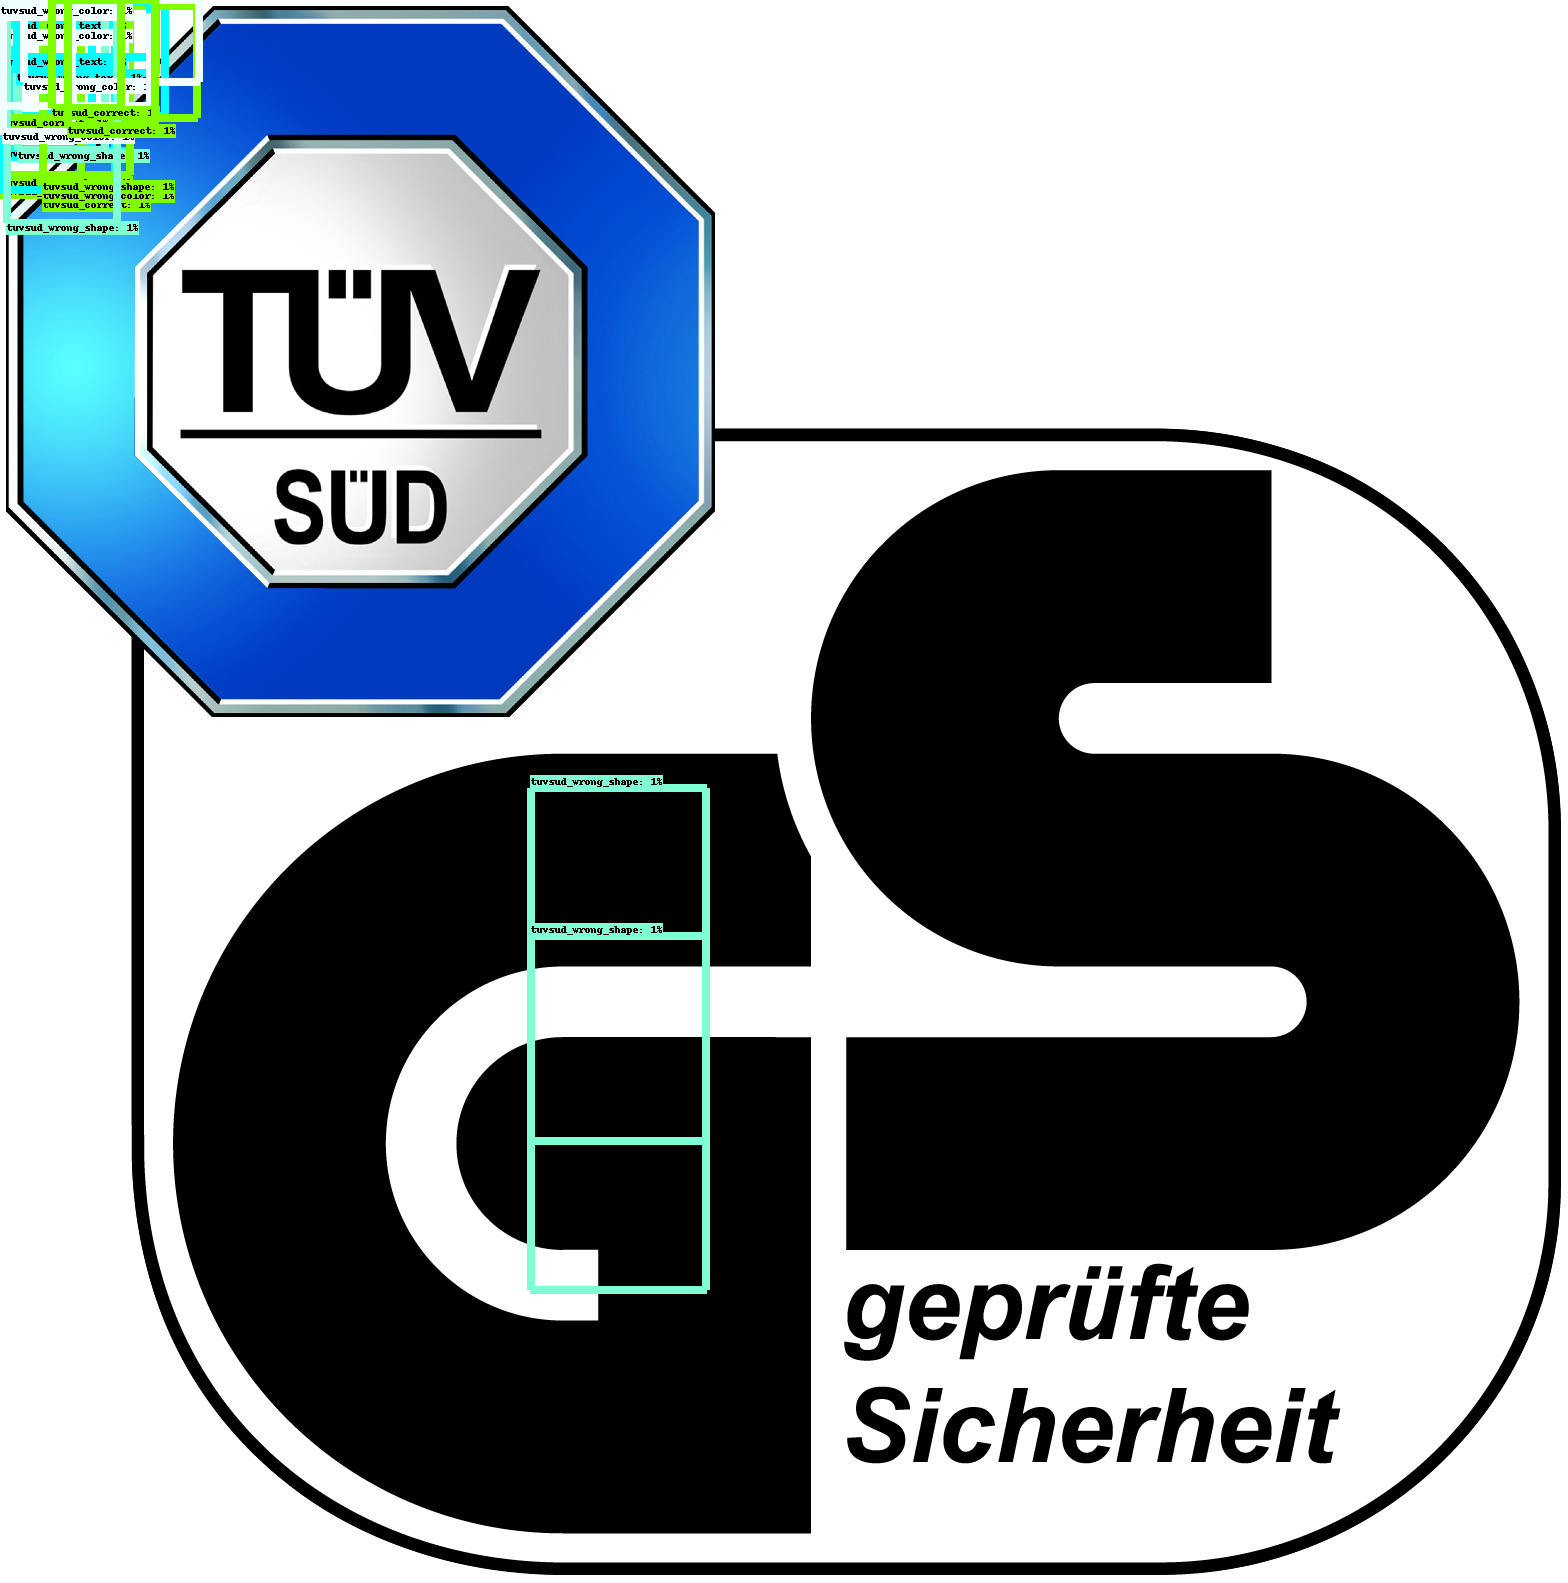

Input image shape: (1583, 1568, 3)


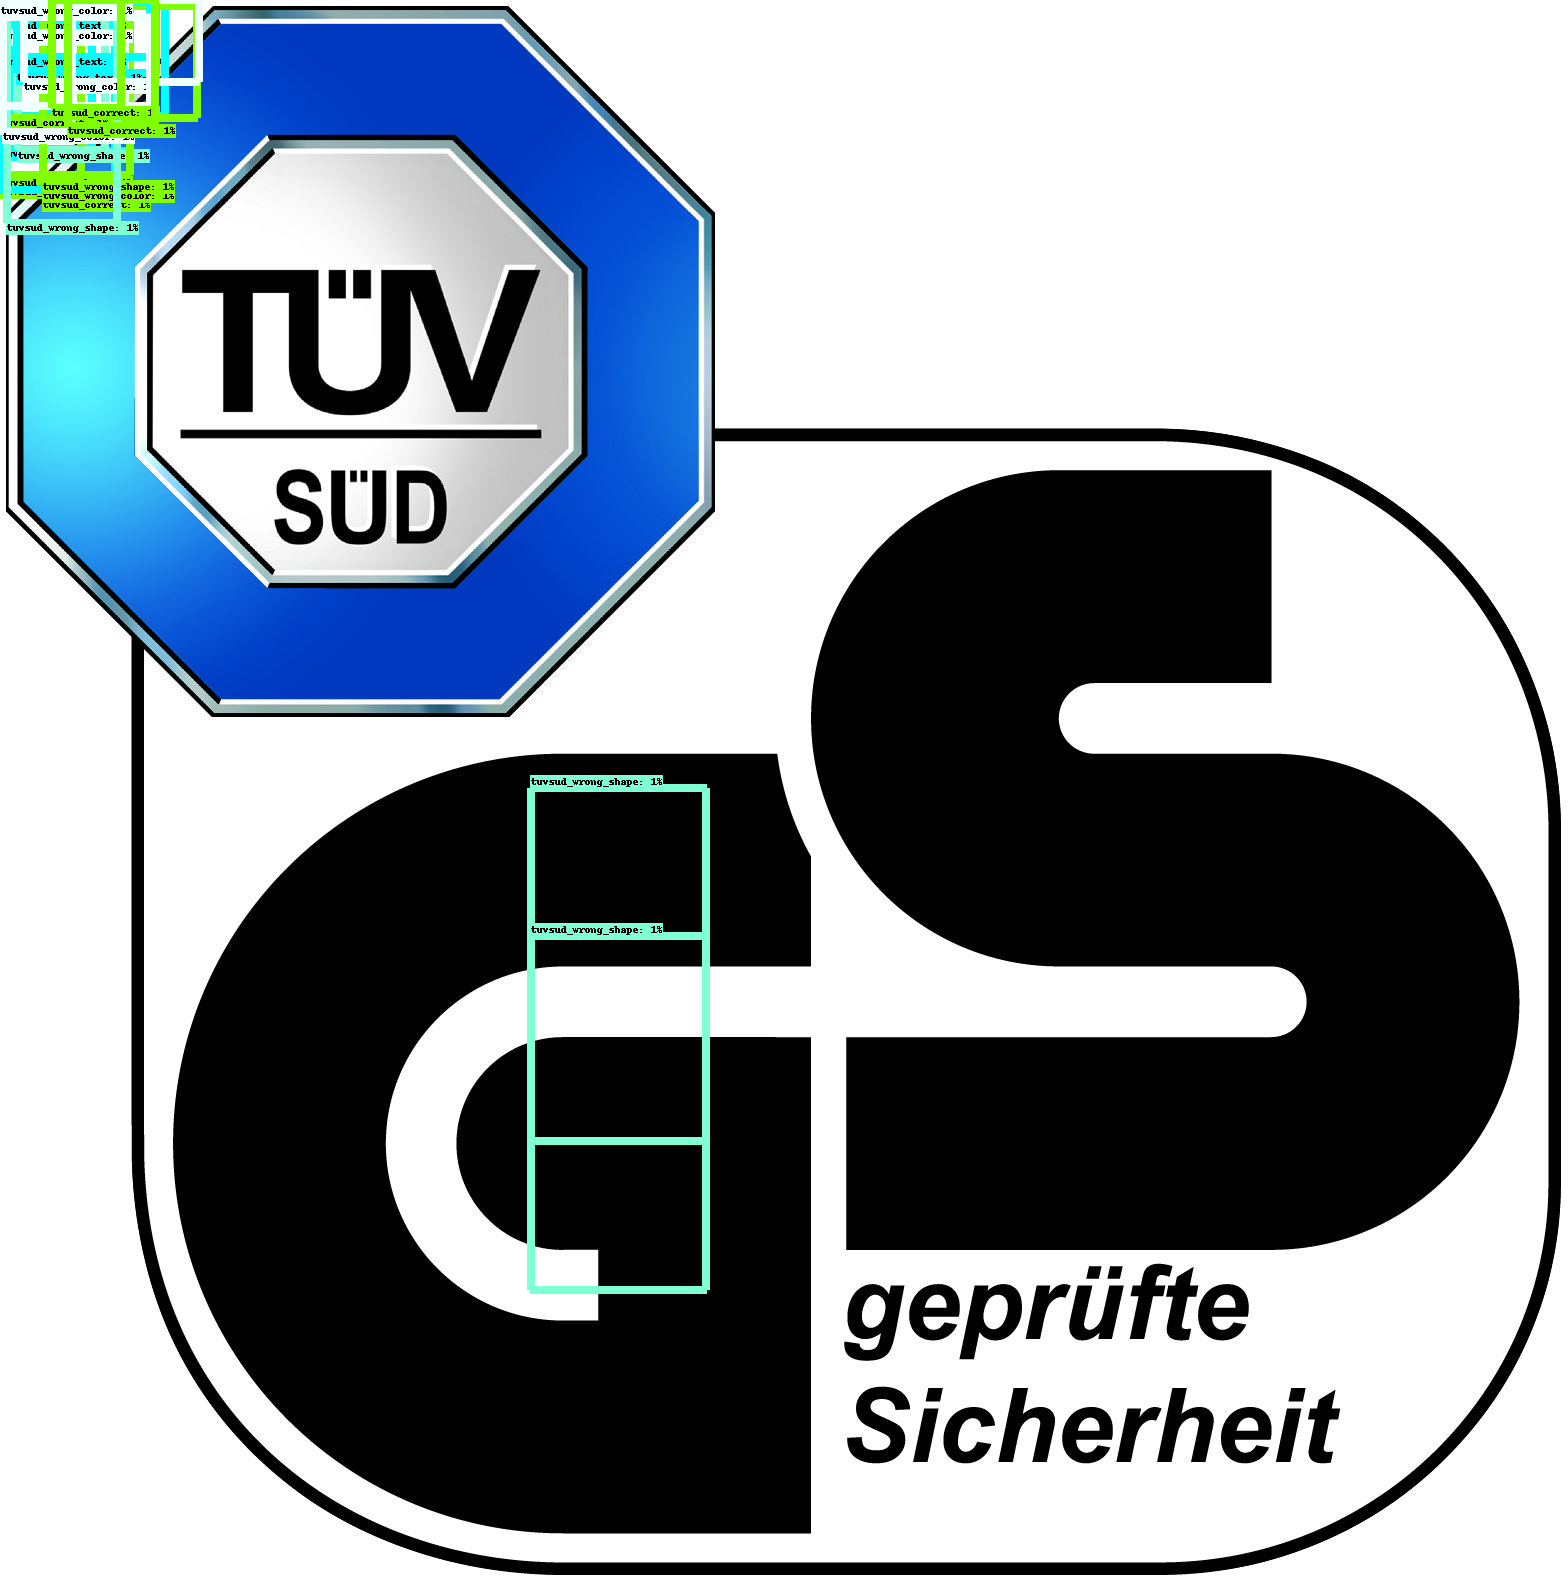

Input image shape: (1583, 1568, 3)


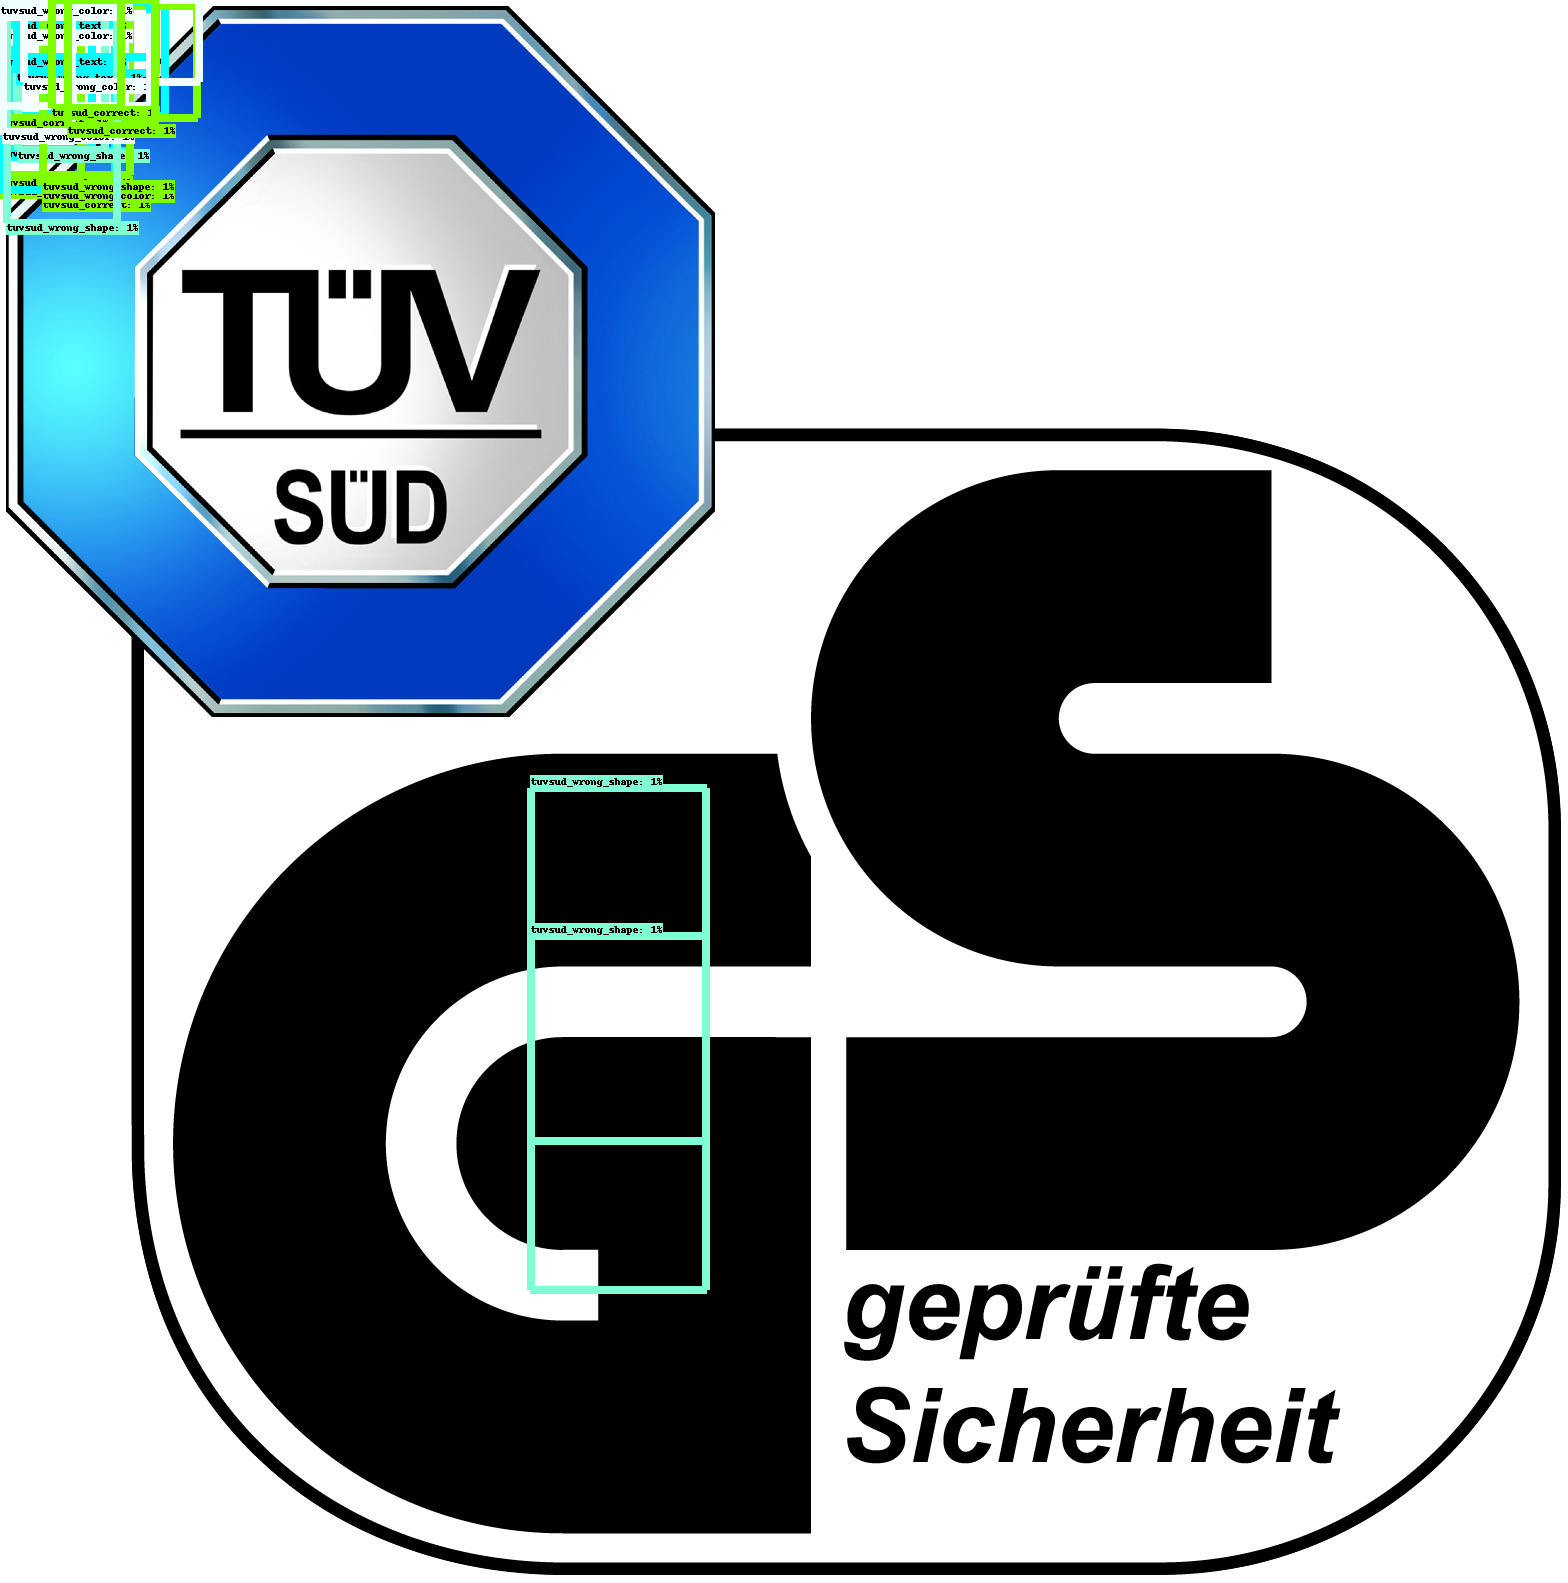

Input image shape: (314, 344, 3)


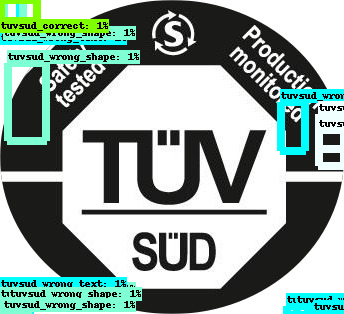

Input image shape: (351, 400, 3)


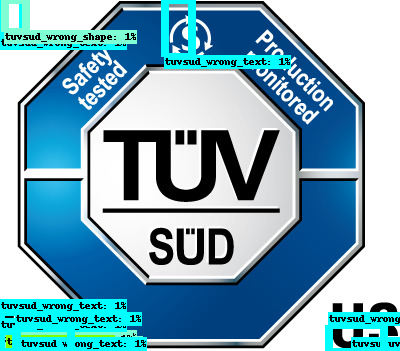

Input image shape: (483, 483, 3)


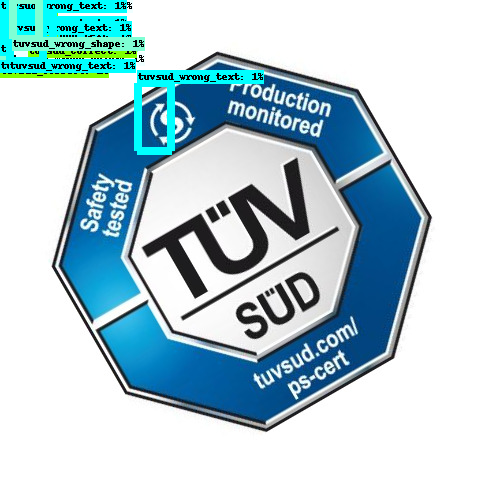

Input image shape: (354, 354, 3)


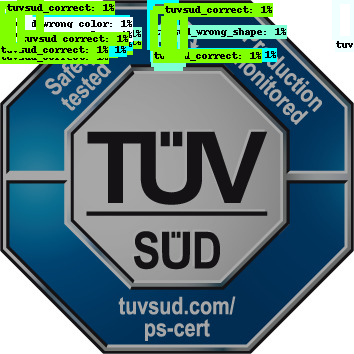

Input image shape: (354, 354, 3)


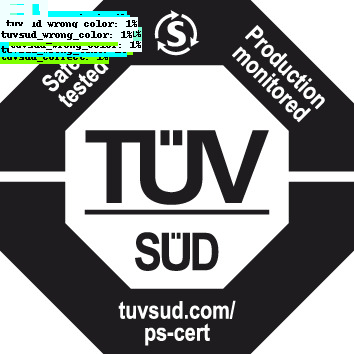

Input image shape: (354, 354, 3)


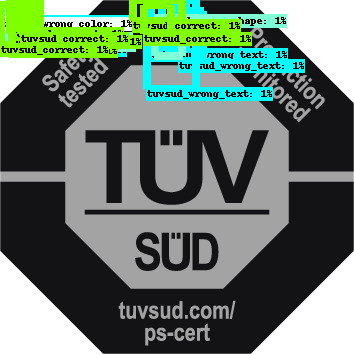

Input image shape: (402, 354, 3)


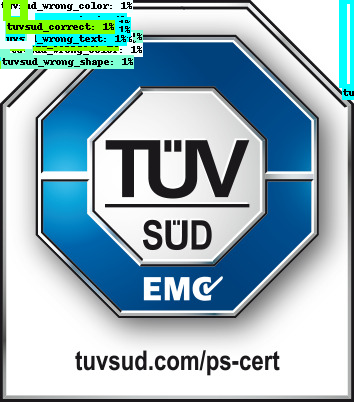

Input image shape: (402, 354, 3)


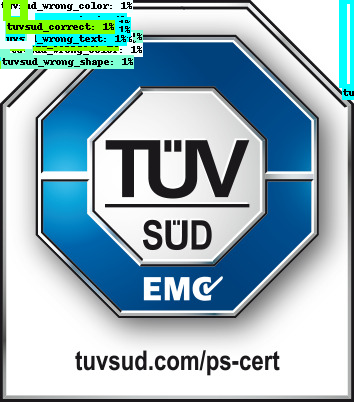

Input image shape: (402, 354, 3)


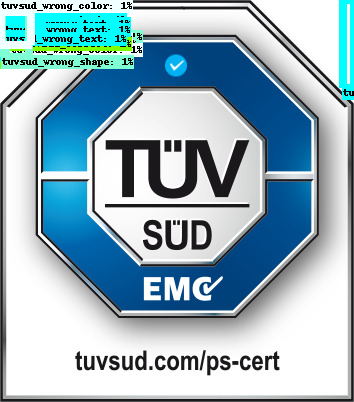

Input image shape: (402, 354, 3)


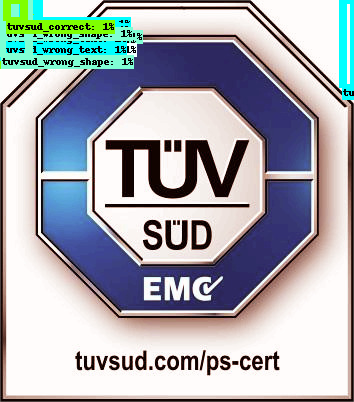

In [54]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
        path: a file path (this can be local or on colossus)

    Returns:
        uint8 numpy array with shape (img_height, img_width, 3)
    """
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data)).convert('RGB')  # Convert to RGB
    (im_width, im_height) = image.size
    return np.array(image).astype(np.uint8)  # Ensure no alpha channel

def show_inference(model, image_path):
    # Load and convert the image to the correct format
    image_np = load_image_into_numpy_array(image_path)  # Ensure image is loaded here
    # Print shape of the image to debug
    print("Input image shape:", image_np.shape)

    # Actual detection
    output_dict = run_inference_for_single_image(model, image_np)

    # Visualization of the results of a detection
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks_reframed', None),
        use_normalized_coordinates=True,
        min_score_thresh=0.0,
        line_thickness=8)

    display(Image.fromarray(image_np))

# Iterate through the images and run inference
for image_path in TEST_IMAGE_PATHS:
    show_inference(model, image_path)


In [53]:
print("Detection scores:", output_dict['detection_scores'])

Detection scores: [0.00995185 0.00995185 0.00995185 0.00995184 0.00995184 0.00995184
 0.00995184 0.00995183 0.00995183 0.00995183 0.00995183 0.00995183
 0.00995183 0.00995183 0.00995183 0.00995183 0.00995183 0.00995183
 0.00995183 0.00995183 0.00995183 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182 0.00995182
 0.00995182 0.00995182 0.00995182 0.00995182